In [34]:
import os 
import tarfile

import pandas as pd
import numpy as np
import matplotlib as mp

In [38]:
data_path = os.path.join("datasets/cltv_data", "train_BRCpofr.csv")

In [39]:
data = pd.read_csv(data_path)

In [40]:
data.head()

id  gender   area qualification         income  marital_status  vintage  \
0   1    Male  Urban      Bachelor         5L-10L               1        5   
1   2    Male  Rural   High School         5L-10L               0        8   
2   3    Male  Urban      Bachelor         5L-10L               1        8   
3   4  Female  Rural   High School         5L-10L               0        7   
4   5    Male  Urban   High School  More than 10L               1        6   

   claim_amount num_policies policy type_of_policy    cltv  
0          5790  More than 1      A       Platinum   64308  
1          5080  More than 1      A       Platinum  515400  
2          2599  More than 1      A       Platinum   64212  
3             0  More than 1      A       Platinum   97920  
4          3508  More than 1      A           Gold   59736

In [41]:
lables = data["cltv"]

In [45]:
data.drop("cltv", axis=1, inplace=True)

In [46]:
data.head()

id  gender   area qualification         income  marital_status  vintage  \
0   1    Male  Urban      Bachelor         5L-10L               1        5   
1   2    Male  Rural   High School         5L-10L               0        8   
2   3    Male  Urban      Bachelor         5L-10L               1        8   
3   4  Female  Rural   High School         5L-10L               0        7   
4   5    Male  Urban   High School  More than 10L               1        6   

   claim_amount num_policies policy type_of_policy  
0          5790  More than 1      A       Platinum  
1          5080  More than 1      A       Platinum  
2          2599  More than 1      A       Platinum  
3             0  More than 1      A       Platinum  
4          3508  More than 1      A           Gold

In [47]:
%matplotlib inline

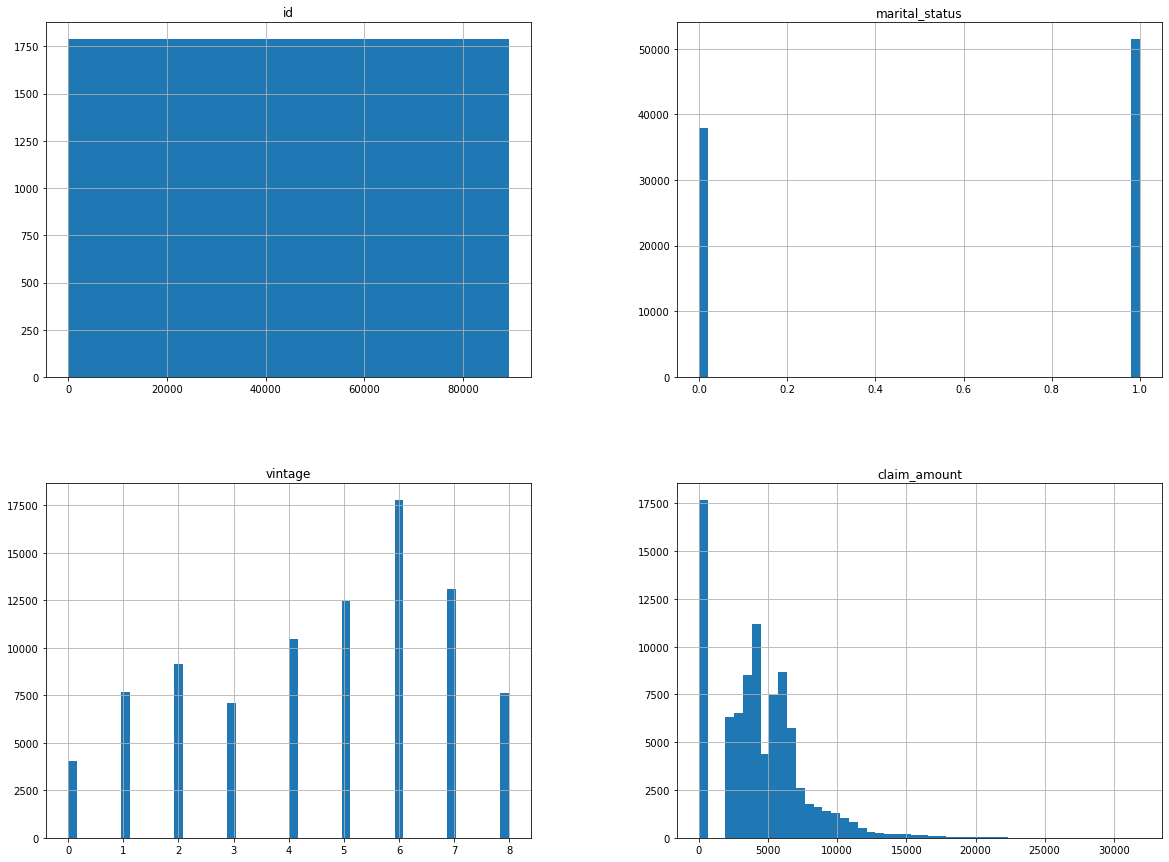

In [48]:
data.hist(bins=50, figsize=(20,15))
mp.pyplot.show()

In [49]:
data["vintage"].value_counts()

6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64

In [51]:
data.isna().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [56]:
gender_data = data[["gender"]]
area_data = data[["area"]]
qualification_data = data[["qualification"]]
income_data = data[["income"]]
num_policies_data = data[["num_policies"]]
policy_data = data[["policy"]]
type_of_policy_data = data[["type_of_policy"]]

In [55]:
policy_data.head()

policy
0      A
1      A
2      A
3      A
4      A

In [57]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [58]:
ordinal_encoder = OrdinalEncoder()

In [59]:
cltv_income_encoded = ordinal_encoder.fit_transform(income_data)
cltv_income_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [3.]])

In [60]:
income_data[:10]

income
0         5L-10L
1         5L-10L
2         5L-10L
3         5L-10L
4  More than 10L
5  More than 10L
6         5L-10L
7         5L-10L
8         5L-10L
9  More than 10L

In [62]:
income_data.value_counts()

income       
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
dtype: int64

In [65]:
ordinal_encoder.categories_

[array(['2L-5L', '5L-10L', '<=2L', 'More than 10L'], dtype=object)]

In [66]:
one_hot_encoder = OneHotEncoder()

In [67]:
income_1hot_encoded = one_hot_encoder.fit_transform(income_data)

In [68]:
income_1hot_encoded

<89392x4 sparse matrix of type '<class 'numpy.float64'>'
	with 89392 stored elements in Compressed Sparse Row format>